In [2]:
import pandas as pd
import numpy as np


# Create a sample dataset with missing values
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15],
    'D': [16, 17, 18, np.nan, 20]
}


# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
     A    B     C     D
0    1  3.0   NaN  16.0
1    2  NaN  12.0  17.0
2  100  7.0  13.0  18.0
3    4  8.0  14.0   NaN
4    5  9.0  15.0  20.0


In [3]:
df


,A,B,C,D
0,1,3.0,NaN,16.0
1,2,NaN,12.0,17.0
2,100,7.0,13.0,18.0
3,4,8.0,14.0,NaN
4,5,9.0,15.0,20.0


In [4]:
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [ ]:
# dropping rows with null values
df.dropna()

,A,B,C,D
2,100,7.0,13.0,18.0
4,5,9.0,15.0,20.0


In [ ]:
# dropping columns with null values
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [ ]:
# fill null values with mean value

df['B'].mean()

np.float64(6.75)

In [8]:
df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [9]:
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [10]:
df['C'].fillna(0)

0     0.0
1    12.0
2    13.0
3    14.0
4    15.0
Name: C, dtype: float64

In [11]:
df['C']

0     NaN
1    12.0
2    13.0
3    14.0
4    15.0
Name: C, dtype: float64

In [12]:
df['C'].fillna("Somestring")

0    Somestring
1          12.0
2          13.0
3          14.0
4          15.0
Name: C, dtype: object

In [13]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
df.shape

(891, 15)

In [17]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [18]:
df.dropna().shape

(182, 15)

In [19]:
df_updated = df.dropna(axis=1)

In [20]:
df_updated

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [21]:
#imputation of missing value

df.isnull().sum() #age is missing at random

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

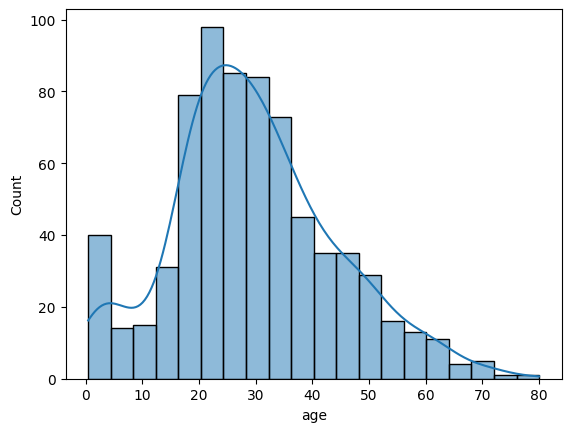

In [22]:
sns.histplot(df.age, kde = True)

In [ ]:
#whenever we have normal distribution data and no outlier, impute with mean

df['mean_imputation'] = df['age'].fillna(df['age'].mean())

In [24]:
df[['age', 'mean_imputation']]

,age,mean_imputation
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


C:\Users\wiryv\AppData\Local\Temp\ipykernel_9584\1592848158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mean_imputation'], kde = True)


<Axes: xlabel='mean_imputation', ylabel='Density'>

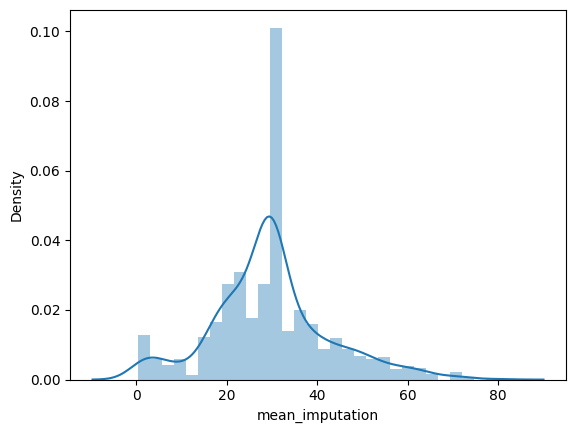

In [25]:
sns.distplot(df['mean_imputation'], kde = True)

In [ ]:
#mean imputation works weak with normally distributed data/no outlier is present

df['median_imputation'] = df['age'].fillna(df['age'].median())
df[['age', 'mean_imputation', 'median_imputation']]

,age,mean_imputation,median_imputation
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [27]:
#imputation of categorical data
df.isnull().sum()

survived               0
pclass                 0
sex                    0
age                  177
sibsp                  0
parch                  0
fare                   0
embarked               2
class                  0
who                    0
adult_male             0
deck                 688
embark_town            2
alive                  0
alone                  0
mean_imputation        0
median_imputation      0
dtype: int64

In [28]:
df['embarked'] 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [29]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df[df['embarked'].isnull()] #missing completely at random

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_imputation,median_imputation
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [31]:
#how many not null values are there
df.notna().sum()

survived             891
pclass               891
sex                  891
age                  714
sibsp                891
parch                891
fare                 891
embarked             889
class                891
who                  891
adult_male           891
deck                 203
embark_town          889
alive                891
alone                891
mean_imputation      891
median_imputation    891
dtype: int64

In [32]:
df[df['embarked'].notna()]['embarked'].mode()#the mode for not null embarked column

0    S
Name: embarked, dtype: object

In [33]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [34]:
df['embarked'].fillna(mode_value)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object